<a href="https://colab.research.google.com/github/Atharva-Waghmare/Deep_Learning/blob/main/practice_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from fastai.data.all import *
from PIL import Image
import pandas as pd
import torch
path=untar_data(URLs.MNIST_SAMPLE)

In [7]:
(path/'train').ls()

(#2) [Path('/root/.fastai/data/mnist_sample/train/3'),Path('/root/.fastai/data/mnist_sample/train/7')]

In [9]:
threes=(path/'train'/'3').ls().sorted()
sevens=(path/'train'/'7').ls().sorted()
threes

(#6131) [Path('/root/.fastai/data/mnist_sample/train/3/10.png'),Path('/root/.fastai/data/mnist_sample/train/3/10000.png'),Path('/root/.fastai/data/mnist_sample/train/3/10011.png'),Path('/root/.fastai/data/mnist_sample/train/3/10031.png'),Path('/root/.fastai/data/mnist_sample/train/3/10034.png'),Path('/root/.fastai/data/mnist_sample/train/3/10042.png'),Path('/root/.fastai/data/mnist_sample/train/3/10052.png'),Path('/root/.fastai/data/mnist_sample/train/3/1007.png'),Path('/root/.fastai/data/mnist_sample/train/3/10074.png'),Path('/root/.fastai/data/mnist_sample/train/3/10091.png'),Path('/root/.fastai/data/mnist_sample/train/3/10093.png'),Path('/root/.fastai/data/mnist_sample/train/3/10097.png'),Path('/root/.fastai/data/mnist_sample/train/3/10099.png'),Path('/root/.fastai/data/mnist_sample/train/3/10116.png'),Path('/root/.fastai/data/mnist_sample/train/3/10125.png'),Path('/root/.fastai/data/mnist_sample/train/3/10137.png'),Path('/root/.fastai/data/mnist_sample/train/3/10141.png'),Path('/ro

In [15]:
x=threes[1]
im=Image.open(x)
im

In [23]:
df=pd.DataFrame(tensor(im)[4:22,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [24]:
three_tensors=[tensor(Image.open(o)) for o in threes]
seven_tensors=[tensor(Image.open(o)) for o in sevens]

<Axes: >

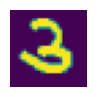

In [25]:
show_image(three_tensors[5])

<Axes: >

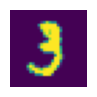

In [31]:
stacked_threes=torch.stack(three_tensors).float()/255
stacked_sevens=torch.stack(seven_tensors).float()/255
mean_3=stacked_threes.mean(0)
mean_7=stacked_sevens.mean(0)
# show_image(mean_3)
a3=stacked_threes[0]
show_image(a3)

In [37]:
dis_abs_3=(a3-mean_3).abs().mean()
dis_abs_7=(a3-mean_7).abs().mean()
dis_sq_3=(a3-mean_3).pow(2).mean().sqrt()
dis_sq_7=(a3-mean_7).pow(2).mean().sqrt()
dis_abs_3,dis_sq_3

(tensor(0.1074), tensor(0.1912))

In [39]:
F.l1_loss(a3.float(),mean_3)

tensor(0.1074)